In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"Credit Score Classification Dataset.csv")
data

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


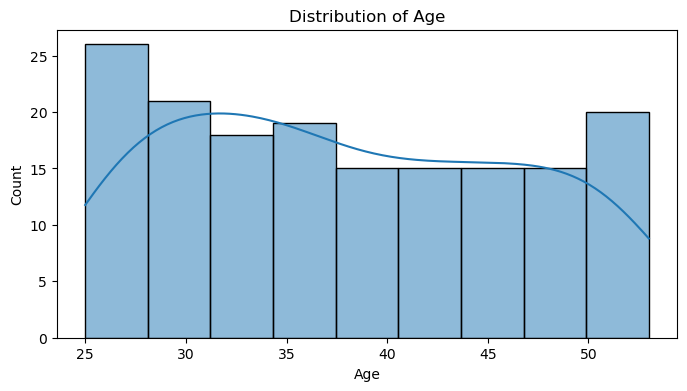

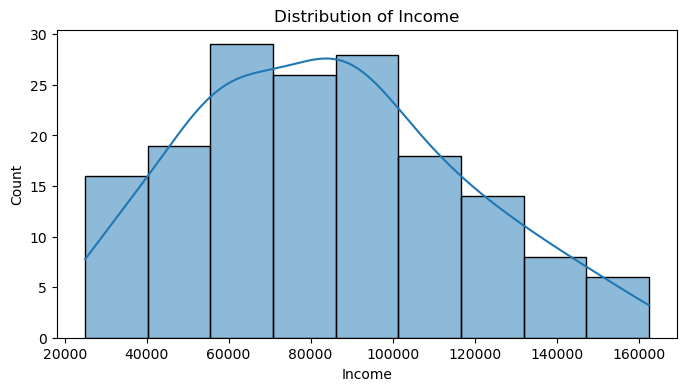

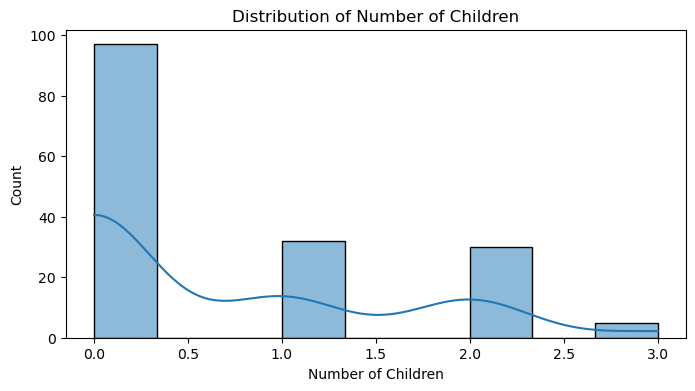

In [4]:
# Visualize the distribution of numerical features
numeric_features = ['Age', 'Income', 'Number of Children']
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

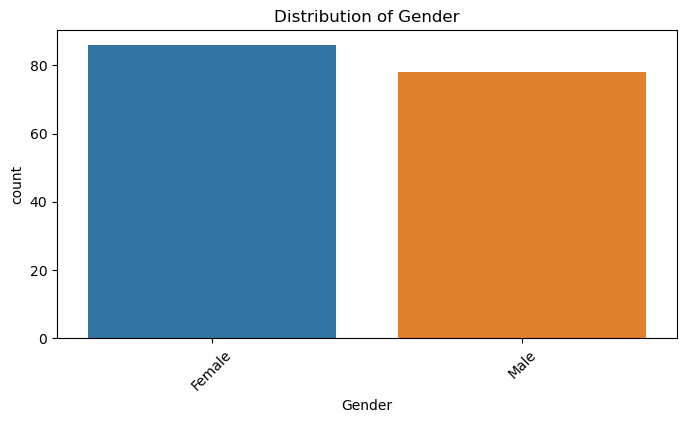

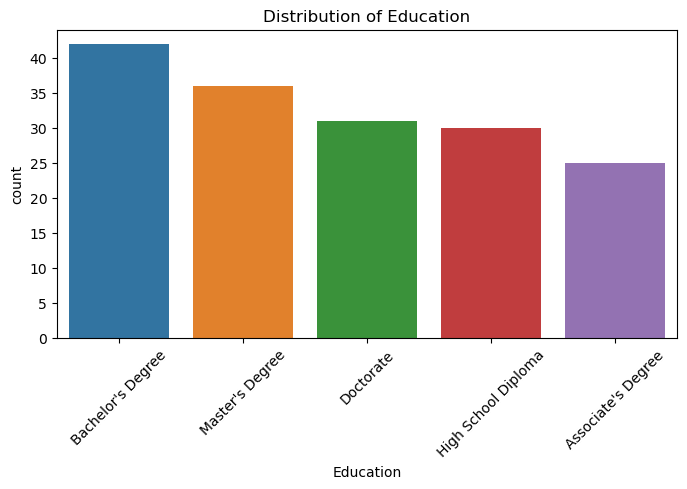

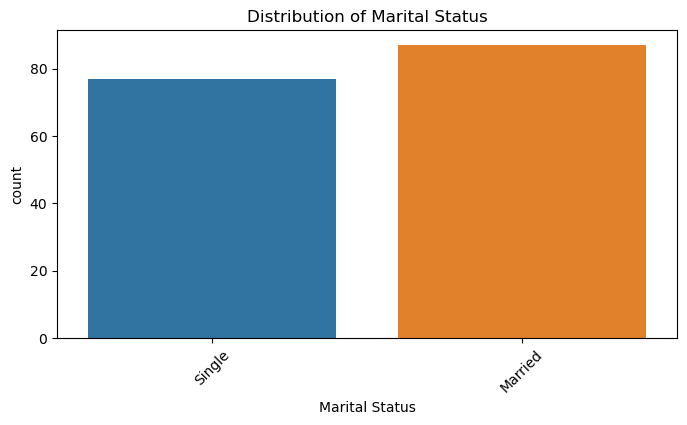

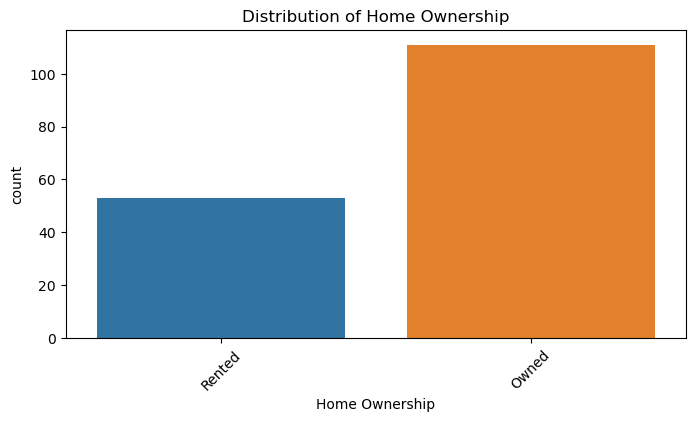

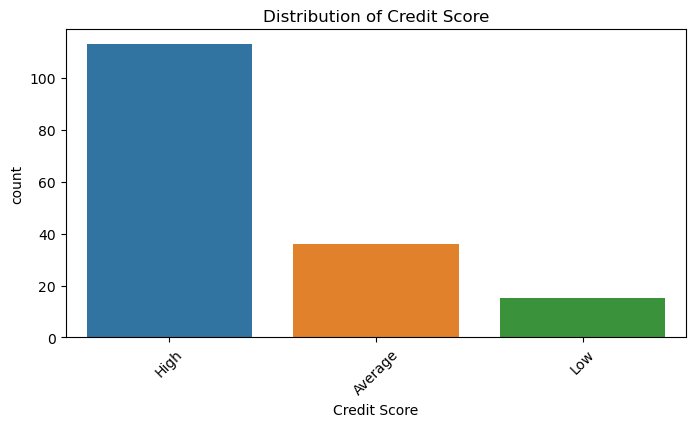

In [5]:
# Visualize the distribution of categorical features
categorical_features = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data[feature])
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

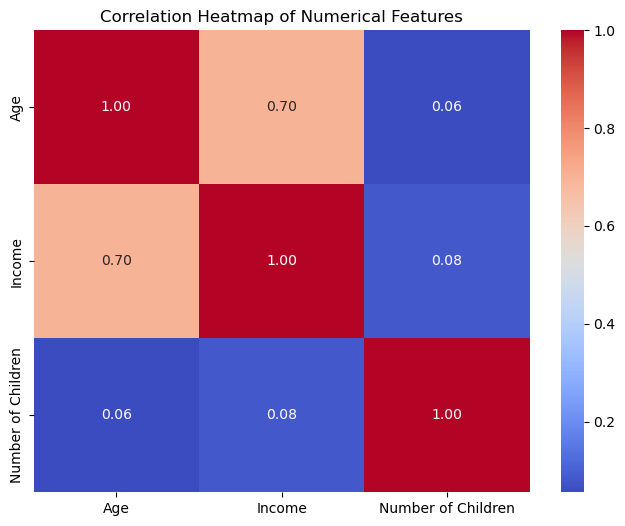

In [6]:
# Create a correlation heatmap for numerical features
correlation_matrix = data[numeric_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [7]:
# Check for missing values in text columns (e.g., 'Education' column)
missing_text_data = data['Education'].isnull().sum()
print(f"Missing values in 'Education' column: {missing_text_data}")

# Handling missing values in text data (e.g., filling with 'Unknown')
data['Education'].fillna('Unknown', inplace=True)

# Check for missing values again
missing_text_data_after_fill = data['Education'].isnull().sum()
print(f"Missing values in 'Education' column after fill: {missing_text_data_after_fill}")

Missing values in 'Education' column: 0
Missing values in 'Education' column after fill: 0


In [8]:
# Specify the target variable ("Credit Score") and features
target_column = 'Credit Score'
features = ['Age', 'Gender', 'Income', 'Education', 'Marital Status', 'Number of Children', 'Home Ownership']

# Split the data into features (X) and the target variable (y)
X = data[features]
y = data[target_column]

In [9]:
# Encode categorical variables (e.g., Gender, Education, Marital Status, Home Ownership)
categorical_features = ['Gender', 'Education', 'Marital Status', 'Home Ownership']
le = LabelEncoder()

for feature in categorical_features:
    X[feature] = le.fit_transform(X[feature])

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Classification Technique 1: Random Forest

In [11]:
# Create and train a classification model (e.g., Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [13]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.96
Confusion Matrix:
 [[ 9  2  0]
 [ 0 32  0]
 [ 0  0  7]]
Classification Report:
               precision    recall  f1-score   support

     Average       1.00      0.82      0.90        11
        High       0.94      1.00      0.97        32
         Low       1.00      1.00      1.00         7

    accuracy                           0.96        50
   macro avg       0.98      0.94      0.96        50
weighted avg       0.96      0.96      0.96        50



# Classification Technique 2: SVC

In [14]:
# Create and train a Support Vector Machine (SVM) classifier
model = SVC(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [15]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.78
Confusion Matrix:
 [[ 9  2  0]
 [ 2 30  0]
 [ 7  0  0]]
Classification Report:
               precision    recall  f1-score   support

     Average       0.50      0.82      0.62        11
        High       0.94      0.94      0.94        32
         Low       0.00      0.00      0.00         7

    accuracy                           0.78        50
   macro avg       0.48      0.59      0.52        50
weighted avg       0.71      0.78      0.74        50



# Regression 

In [16]:
data2 = pd.read_csv(r"Housing.csv")
data2

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


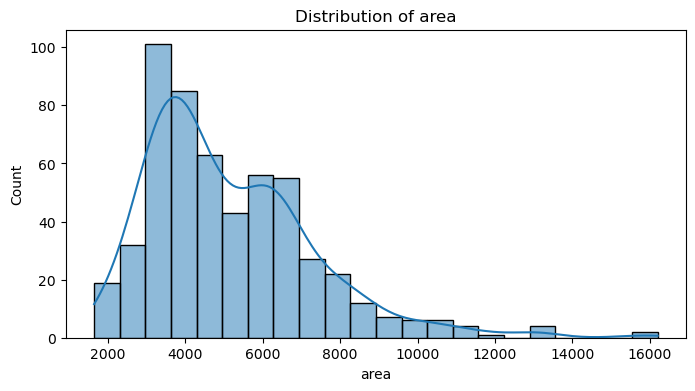

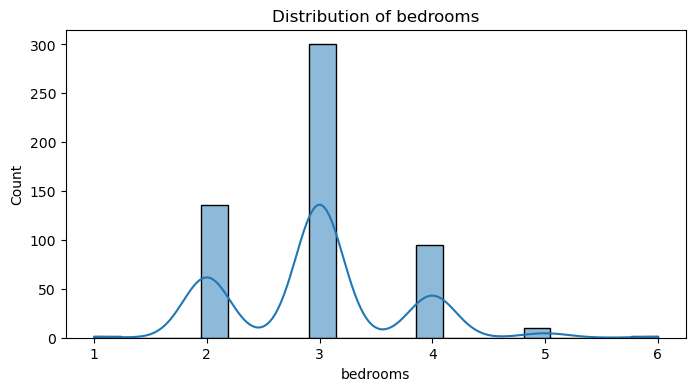

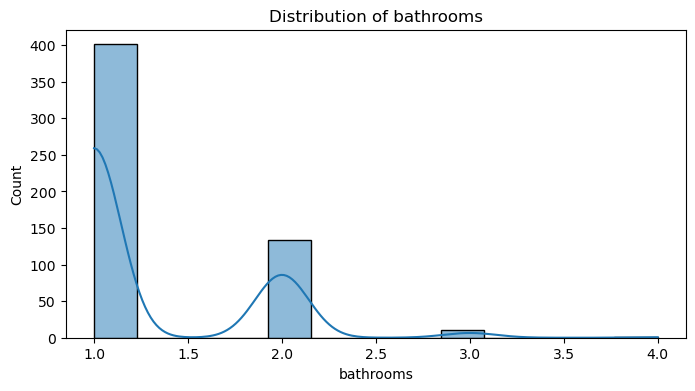

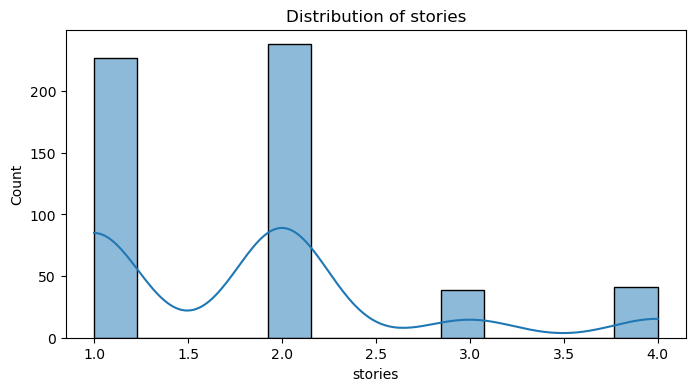

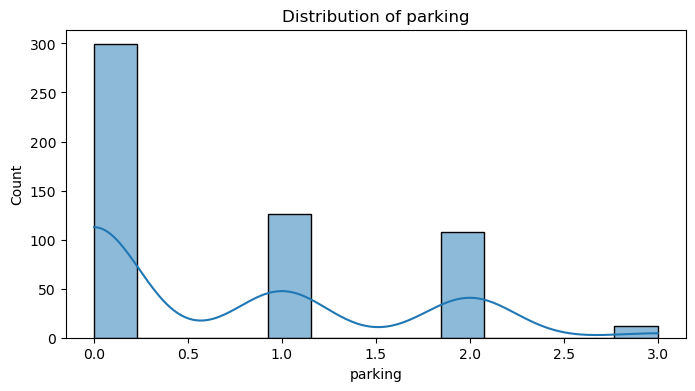

In [18]:
# Visualize the distribution of numerical features
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data2[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

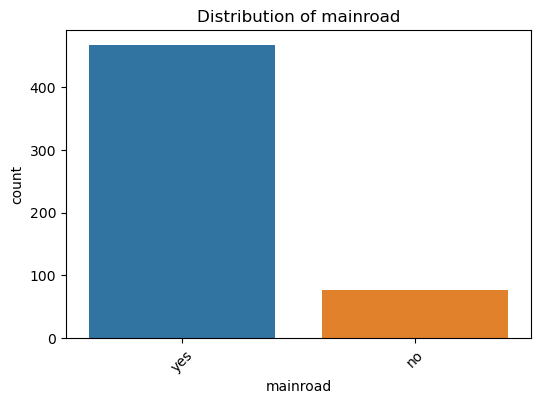

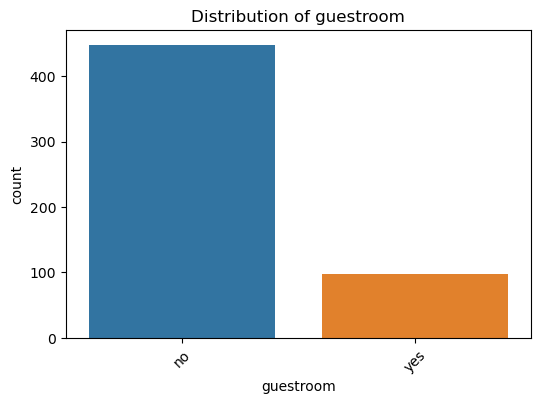

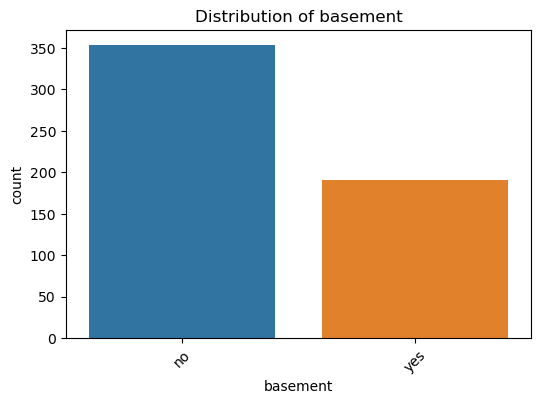

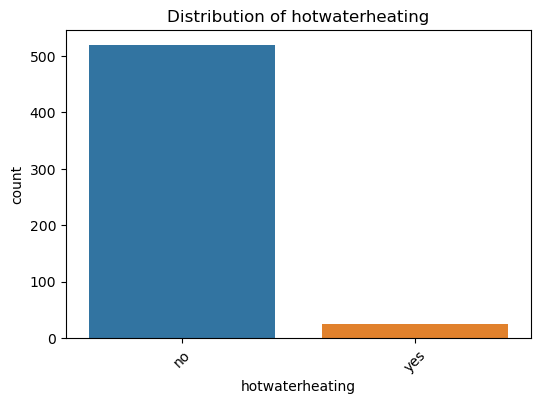

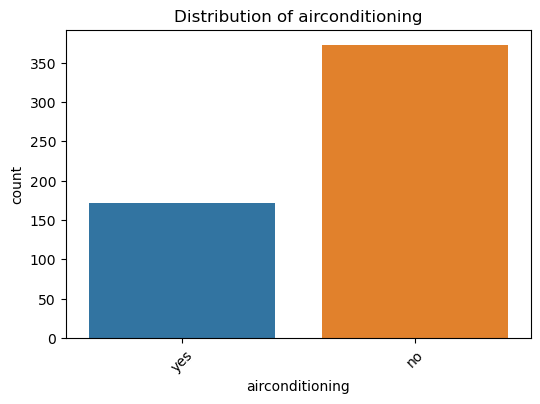

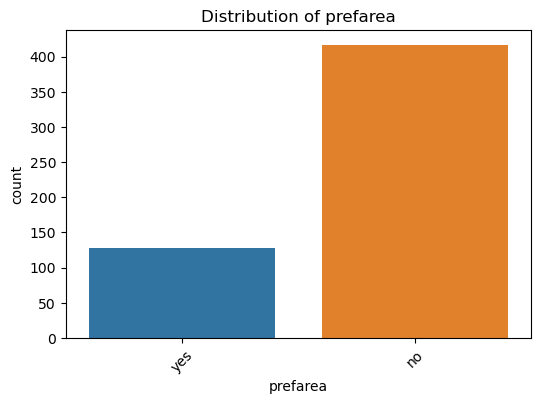

In [19]:
# Visualize the distribution of binary categorical features
binary_categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for feature in binary_categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data2[feature])
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

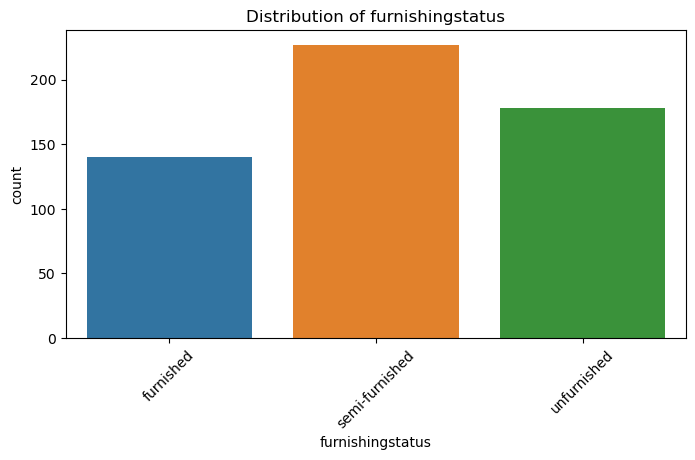

In [20]:
# Visualize the distribution of multi-class categorical features
multiclass_categorical_features = ['furnishingstatus']
for feature in multiclass_categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data2[feature])
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

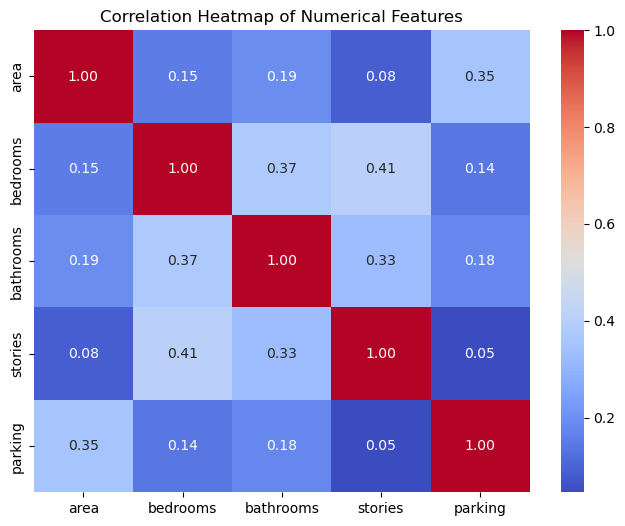

In [21]:
# Create a correlation heatmap for numerical features
correlation_matrix = data2[numeric_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [22]:
# Check for missing values in numerical columns (e.g., 'bathrooms' column)
missing_numerical_data = data2['bathrooms'].isnull().sum()
print(f"Missing values in 'bathrooms' column: {missing_numerical_data}")

# Handling missing values in numerical data (e.g., filling with the median)
median_bathrooms = data2['bathrooms'].median()
data2['bathrooms'].fillna(median_bathrooms, inplace=True)

# Check for missing values again
missing_numerical_data_after_fill = data2['bathrooms'].isnull().sum()
print(f"Missing values in 'bathrooms' column after fill: {missing_numerical_data_after_fill}")

Missing values in 'bathrooms' column: 0
Missing values in 'bathrooms' column after fill: 0


In [23]:
# Specify the binary categorical columns with 'yes'/'no' values
binary_categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Use pd.get_dummies with drop_first=True to perform one-hot encoding
data_encoded = pd.get_dummies(data2, columns=binary_categorical_columns, drop_first=True)

In [24]:
data2['furnishingstatus']= data2['furnishingstatus'].map({'unfurnished':0,'semi-furnished':1,'furnished':2}).astype(int)

In [25]:
X = data2.drop(['price'],axis = 1)
y = data2[["price"]]

In [26]:
# Perform binary encoding for binary categorical columns
binary_categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for column in binary_categorical_columns:
    X[column] = X[column].map({'yes': 1, 'no': 0})

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regression Technique 1: Linear Regression

In [28]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1535047758428.05
R-squared: 0.64


# Regression Technique 2: Random Forest

In [29]:
# Create and train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1835161666074.31
R-squared: 0.57
